In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


/Users/gyan/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Loading the dataset
df = pd.read_csv('/Users/gyan/Documents/Knowledge Discovery and Data Mining/CSV Files/MTA_Congestion_Relief_Zone_Vehicle_Entries__Beginning_2025_20250319 - MTA_Congestion_Relief_Zone.csv', na_values='?')


In [3]:
# Dropping unnecessary columns
df = df.drop(columns=[
    'Toll Hour', 'Toll 10 Minute Block', 'Day of Week Int', 'Time Period', 'Excluded Roadway Entries'
])

In [4]:
# Defining data types
df = df.astype({
    'Toll Week': 'datetime64[ns]',
    'Minute of Hour': 'Int64',
    'Hour of Day': 'Int64',
    'Day of Week': 'category',
    'Detection Region': 'category',
    'CRZ Entries': 'Int64'
})

In [5]:
df = df.groupby(['Toll Week', 'Hour of Day', 'Day of Week', 'Minute of Hour']).agg(CRZ_Entries=('CRZ Entries', 'sum'))
df.head()

/var/folders/d6/848xvl9j4n5b8dzx9yrm176c0000gn/T/ipykernel_94574/2813898462.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['Toll Week', 'Hour of Day', 'Day of Week', 'Minute of Hour']).agg(CRZ_Entries=('CRZ Entries', 'sum'))


CRZ_Entries
Toll Week  Hour of Day Day of Week Minute of Hour             
2025-01-05 0           Friday      0                      2063
                                   10                     1875
                                   20                     1694
                                   30                     1736
                                   40                     1509

In [6]:
df = df.reset_index()
df.head()

,Toll Week,Hour of Day,Day of Week,Minute of Hour,CRZ_Entries
0,2025-01-05,0,Friday,0,2063
1,2025-01-05,0,Friday,10,1875
2,2025-01-05,0,Friday,20,1694
3,2025-01-05,0,Friday,30,1736
4,2025-01-05,0,Friday,40,1509


In [7]:
# Dropping missing rows
df = df.dropna()

In [8]:
# Creating binary label based on CRZ Entries median
threshold = df['CRZ_Entries'].median()
df['High_Congestion'] = (df['CRZ_Entries'] >= threshold).astype(int)


In [9]:
# Dropping datetime column (not suitable for Naive Bayes)
df = df.drop(columns=['Toll Week'])


In [10]:
# Encoding categorical variables
X = pd.get_dummies(df.drop(columns=['CRZ_Entries', 'High_Congestion']), drop_first=True)
y = df['High_Congestion']


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Training Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
# Evaluating model
y_pred = model.predict(X_test)

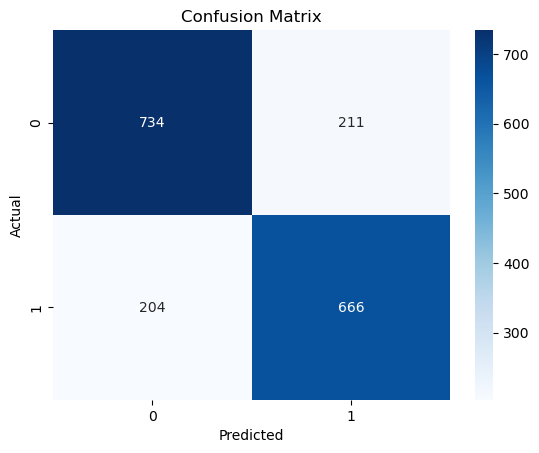

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Classification Report
print("🔎 Classification Report:\n")
print(classification_report(y_test, y_pred))


🔎 Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       945
           1       0.76      0.77      0.76       870

    accuracy                           0.77      1815
   macro avg       0.77      0.77      0.77      1815
weighted avg       0.77      0.77      0.77      1815



In [16]:
# Creating a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred
})

In [17]:
# Counting actual and predicted congestion labels
counts = comparison_df.apply(pd.Series.value_counts).fillna(0)

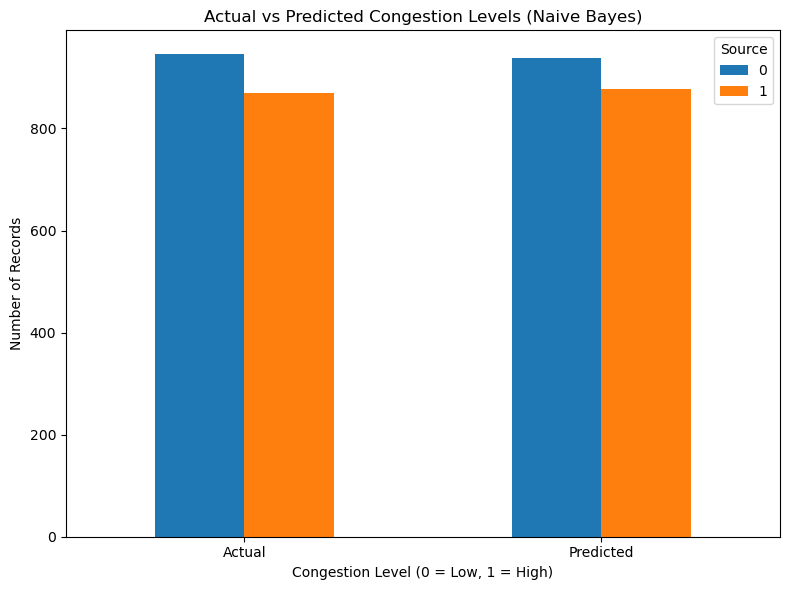

In [18]:
# Plotting comparison
counts.T.plot(kind='bar', figsize=(8, 6))
plt.title('Actual vs Predicted Congestion Levels (Naive Bayes)')
plt.xlabel('Congestion Level (0 = Low, 1 = High)')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

In [19]:
actual_counts = y_test.value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

In [20]:
print(f"Actual Data:")
print(f"  - {actual_counts[0]} records labeled as Low Congestion (0)")
print(f"  - {actual_counts[1]} records labeled as High Congestion (1)")
print(f"Predicted Data:")
print(f"  - {predicted_counts[0]} predicted as Low Congestion (0)")
print(f"  - {predicted_counts[1]} predicted as High Congestion (1)")


Actual Data:
  - 945 records labeled as Low Congestion (0)
  - 870 records labeled as High Congestion (1)
Predicted Data:
  - 938 predicted as Low Congestion (0)
  - 877 predicted as High Congestion (1)
